In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
from IPython.display import Image, HTML

import laUtilities as ut

%matplotlib inline

import statsmodels.api as sm

def centerAxes(ax):
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    bounds = np.array([ax.axes.get_xlim(), ax.axes.get_ylim()])
    ax.plot(bounds[0][0],bounds[1][0],'')
    ax.plot(bounds[0][1],bounds[1][1],'')

# Linear Regression

<img src="figs/Sir_Francis_Galton_by_Charles_Wellington_Furse.jpg" alt="Figure" width="45%">

In [2]:
HTML(u'<a href="https://commons.wikimedia.org/wiki/File:Sir_Francis_Galton_by_Charles_Wellington_Furse.jpg#/media/File:Sir_Francis_Galton_by_Charles_Wellington_Furse.jpg">Sir Francis Galton by Charles Wellington Furse</a> by Charles Wellington Furse (died 1904) - <a href="//en.wikipedia.org/wiki/National_Portrait_Gallery,_London" class="extiw" title="en:National Portrait Gallery, London">National Portrait Gallery</a>: <a rel="nofollow" class="external text" href="http://www.npg.org.uk/collections/search/portrait.php?search=ap&amp;npgno=3916&amp;eDate=&amp;lDate=">NPG 3916</a>')

<img src="figs/galton-title.png" alt="Figure" width="55%">

In 1886 Francis Galton published his observations about how random factors affect outliers.

This notion has come to be called "regression to the mean" because unusually large or small phenomena, after the influence of random events, become closer to their mean values (less extreme).

<img src="figs/galton-regression.png" alt="Figure" width="55%">

Galton fit a straight line to this effect, and the fitting of lines or curves to data has come to be called regression as well.

The most common form of machine learning is __regression__, which means constructing an equation that describes the relationships among variables.

It is a form of supervised learning: whereas __classification__ deals with predicting categorical features (labels or classes), __regression__ deals with predicting continuous features (real values).

For example, we may look at these points and decide to model them using a line.

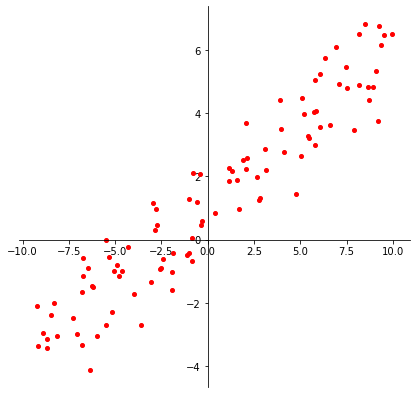

In [3]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0] + (line[1] * xlin) + np.random.randn(100)
ax.plot(xlin, ylin, 'ro', markersize = 4);

We may look at these points and decide to model them using a quadratic function.

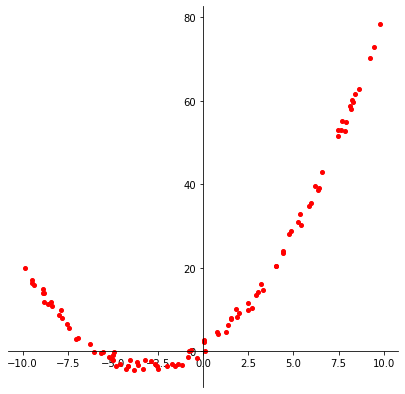

In [4]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
quad = np.array([1, 3, 0.5])
xquad = -10.0 + 20.0 * np.random.random(100)
yquad = quad[0] + (quad[1] * xquad) + (quad[2] * xquad * xquad) + np.random.randn(100)
ax.plot(xquad, yquad, 'ro', markersize = 4);

And we may look at these points and decide to model them using a logarithmic function.

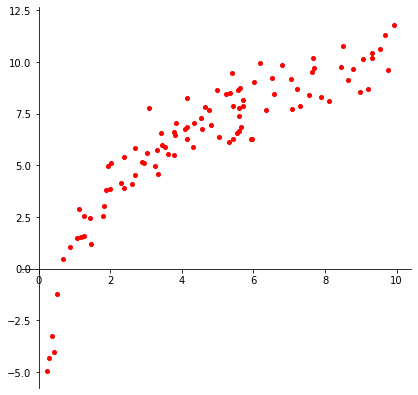

In [5]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
log = np.array([1, 4])
xlog = 10.0 * np.random.random(100)
ylog = log[0] + log[1] * np.log(xlog) + np.random.randn(100)
ax.plot(xlog, ylog, 'ro', markersize=4);

Clearly, none of these datasets agrees perfectly with the proposed model.   So the question arises:

How do we find the __best__ linear function (or quadratic function, or logarithmic function) given the data?

__Framework.__

This problem has been studied extensively in the field of statistics.   Certain terminology is used:

* Some values are referred to as "independent," and
* Some values are referred to as "dependent."

The basic regression task is: 
* given a set of independent variables 
* and the associated dependent variables, 
* estimate the parameters of a model (such as a line, parabola, etc) that describes how the dependent variables are related to the independent variables.

The independent variables are collected into a matrix $X,$ which is called the __design matrix.__

The dependent variables are collected into an __observation__ vector $\mathbf{y}.$

The parameters of the model (for any kind of model) are collected into a __parameter__ vector $\mathbf{\beta}.$

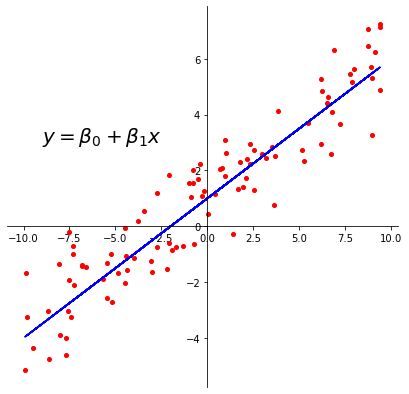

In [6]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0] + (line[1] * xlin) + np.random.randn(100)
ax.plot(xlin, ylin, 'ro', markersize = 4)
ax.plot(xlin, line[0] + line[1] * xlin, 'b-')
plt.text(-9, 3, r'$y = \beta_0 + \beta_1x$', size=20);

## Least-Squares Lines

The first kind of model we'll study is a linear equation, $y = \beta_0 + \beta_1 x.$

Experimental data often produce points $(x_1, y_1), \dots, (x_n,y_n)$ that seem to lie close to a line.   

We want to determine the parameters $\beta_0, \beta_1$ that define a line that is as "close" to the points as possible.

Suppose we have a line $y = \beta_0 + \beta_1 x$.   For each data point $(x_j, y_j),$ there is a point $(x_j, \beta_0 + \beta_1 x_j)$ that is the point on the line with the same $x$-coordinate.

<img src="figs/Lay-fig-6-6-1.jpg" alt="Figure" width="55%">

Image from Lay, _Linear Algebra and its Applications,_ 4th edition

We call 
* $y_j$ the __observed__ value of $y$ and 
* $\beta_0 + \beta_1 x_j$ the __predicted__ $y$-value.   

The difference between an observed $y$-value and a predicted $y$-value is called a __residual__.

There are several ways of measure how "close" the line is to the data. 

The usual choice is to sum the squares of the residuals.  

The __least-squares line__ is the line $y = \beta_0 + \beta_1x$ that minimizes the sum of squares of the residuals. 

The coefficients $\beta_0, \beta_1$ of the line are called __regression coefficients.__

__A least-squares problem.__

If the data points were on the line, the parameters $\beta_0$ and $\beta_1$ would satisfy the equations

$$\beta_0 + \beta_1 x_1 = y_1 $$
$$\beta_0 + \beta_1 x_2 = y_2 $$
$$\beta_0 + \beta_1 x_3 = y_3 $$
$$ \vdots$$
$$\beta_0 + \beta_1 x_n = y_n $$

We can write this system as 

$$X\mathbf{\beta} = \mathbf{y}$$

where 

$$X=\begin{bmatrix}1&x_1\\1&x_2\\\vdots&\vdots\\1&x_n\end{bmatrix},\;\;\mathbf{\beta} = \begin{bmatrix}\beta_0\\\beta_1\end{bmatrix},\;\;\mathbf{y}=\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix}$$

Of course, if the data points don't actually lie exactly on a line, 

... then there are no parameters $\beta_0, \beta_1$ for which the predicted $y$-values in $X\mathbf{\beta}$ equal the observed $y$-values in $\mathbf{y}$, 

... and $X\mathbf{\beta}=\mathbf{y}$ has no solution.

Now, since the data doesn't fall exactly on a line, we have decided to seek the $\beta$ that minimizes the sum of squared residuals, ie,

$$\sum_i (\beta_0 + \beta_1 x_i - y_i)^2$$

$$=\Vert X\beta -\mathbf{y}\Vert^2$$

This is key: __the sum of squares of the residuals__ is __exactly__ the __square of the distance between the vectors $X\mathbf{\beta}$ and $\mathbf{y}.$__

Computing the least-squares solution of $X\beta = \mathbf{y}$ is equivalent to finding the $\mathbf{\beta}$ that determines the least-squares line.

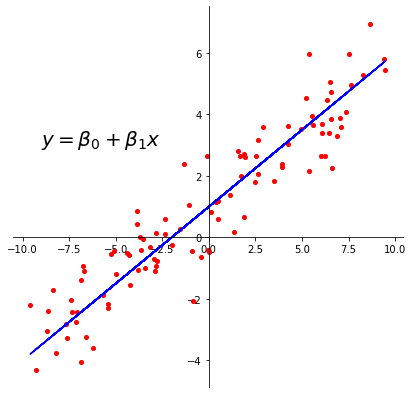

In [7]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
line = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0] + (line[1] * xlin) + np.random.randn(100)
ax.plot(xlin, ylin, 'ro', markersize = 4)
ax.plot(xlin, line[0] + line[1] * xlin, 'b-')
plt.text(-9, 3, r'$y = \beta_0 + \beta_1x$', size=20);

Now, to obtain the least-squares line, find the least-squares solution to $X\mathbf{\beta} = \mathbf{y}.$

From linear algebra we know that the least squares solution of $X\mathbf{\beta} = \mathbf{y}$ is given by the solution of the __normal equations__:

$$X^TX\mathbf{\beta} = X^T\mathbf{y}$$

We also know that the normal equations __always__ have at least one solution.

And if $X^TX$ is invertible, there is a unique solution that is given by:
    
$$\hat{\mathbf{\beta}} = (X^TX)^{-1} X^T\mathbf{y}$$

## The General Linear Model

Another way that the inconsistent linear system is often written is to collect all the residuals into a __residual vector.__ 

Then an exact equation is

$$y = X\mathbf{\beta} + {\mathbf\epsilon}$$

Any equation of this form is referred to as a __linear model.__ 

In this formulation, the goal is to find the $\beta$ so as to minimize the length of $\epsilon$, ie, $\Vert\epsilon\Vert.$

In some cases, one would like to fit data points with something other than a straight line.  

In cases like this, the matrix equation is still $X\mathbf{\beta} = \mathbf{y}$, but the specific form of $X$ changes from one problem to the next.

## Least-Squares Fitting of Other Models

In model fitting, the parameters of the model are what is unknown.  

A central question for us is whether the model is _linear_ in its parameters.

For example, the model 

$$y = \beta_0 e^{-\beta_1 x}$$

is __not__ linear in its parameters.  

The model 

$$y = \beta_0 e^{-2 x}$$

__is__ linear in its parameters.

For a model that is linear in its parameters, an observation is a linear combination of (arbitrary) known functions.

In other words, a model that is linear in its parameters is

$$y = \beta_0f_0(x) + \beta_1f_1(x) + \dots + \beta_nf_n(x)$$

where $f_0, \dots, f_n$ are known functions and $\beta_0,\dots,\beta_k$ are parameters.

__Example.__  

Suppose data points $(x_1, y_1), \dots, (x_n, y_n)$ appear to lie along some sort of parabola instead of a straight line.  

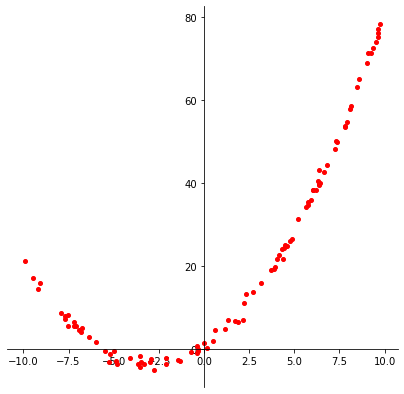

In [8]:
ax = plt.figure(figsize = (7, 7)).add_subplot()
centerAxes(ax)
quad = np.array([1, 3, 0.5])
xquad = -10.0 + 20.0 * np.random.random(100)
yquad = quad[0] + (quad[1] * xquad) + (quad[2] * xquad * xquad) + np.random.randn(100)
ax.plot(xquad, yquad, 'ro', markersize = 4);

As a result, we wish to approximate the data by an equation of the form

$$y = \beta_0 + \beta_1x + \beta_2x^2.$$

Let's describe the linear model that produces a "least squares fit" of the data by the equation.

__Solution.__  The ideal relationship is $y = \beta_0 + \beta_1x + \beta_2x^2.$

Suppose the actual values of the parameters are $\beta_0, \beta_1, \beta_2.$  Then the coordinates of the first data point satisfy the equation

$$y_1 = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \epsilon_1$$

where $\epsilon_1$ is the residual error between the observed value $y_1$ and the predicted $y$-value.

Each data point determines a similar equation:

$$y_1 = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \epsilon_1$$
$$y_2 = \beta_0 + \beta_1x_2 + \beta_2x_2^2 + \epsilon_2$$
$$\vdots$$
$$y_n = \beta_0 + \beta_1x_n + \beta_2x_n^2 + \epsilon_n$$

Clearly, this system can be written as $\mathbf{y} = X\mathbf{\beta} + \mathbf{\epsilon}.$

$$\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix} = \begin{bmatrix}1&x_1&x_1^2\\1&x_2&x_2^2\\\vdots&\vdots&\vdots\\1&x_n&x_n^2\end{bmatrix} \begin{bmatrix}\beta_0\\\beta_1\\\beta_2\end{bmatrix} + \begin{bmatrix}\epsilon_1\\\epsilon_2\\\vdots\\\epsilon_n\end{bmatrix}$$

In [9]:
#
# Input data are in the vectors xquad and yquad
#
# estimate the parameters of the linear model
#
m = np.shape(xquad)[0]
X = np.array([np.ones(m), xquad, xquad**2]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ yquad

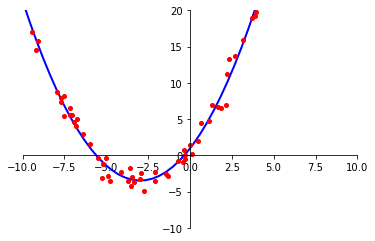

In [10]:
#
# plot the results
#
ax = ut.plotSetup(-10, 10, -10, 20)
ut.centerAxes(ax)
xplot = np.linspace(-10, 10, 50)
yestplot = beta[0] + beta[1] * xplot + beta[2] * xplot**2
ax.plot(xplot, yestplot, 'b-', lw=2)
ax.plot(xquad, yquad, 'ro', markersize=4);

In [11]:
#
# Input data are in the vectors xlog and ylog
#
# estimate the parameters of the linear model
#
m = np.shape(xlog)[0]
X = np.array([np.ones(m), np.log(xlog)]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ ylog

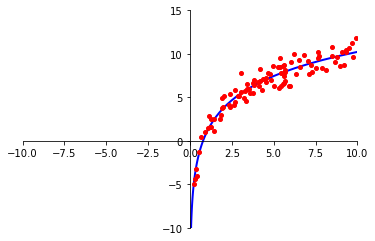

In [12]:
# 
# plot the results
#
ax = ut.plotSetup(-10,10,-10,15)
ut.centerAxes(ax)
xplot = np.logspace(np.log10(0.0001),1,100)
yestplot = beta[0]+beta[1]*np.log(xplot)
ax.plot(xplot,yestplot,'b-',lw=2)
ax.plot(xlog,ylog,'ro',markersize=4);

## Multiple Regression

Suppose an experiment involves two independent variables -- say, $u$ and $v$, -- and one dependent variable, $y$.  A simple equation for predicting $y$ from $u$ and $v$ has the form

$$y = \beta_0 + \beta_1 u + \beta_2 v$$

Since there is more than one independent variable, this is called __multiple regression.__

A more general prediction equation might have the form

$$y = \beta_0 + \beta_1 u + \beta_2 v + \beta_3u^2 + \beta_4 uv + \beta_5 v^2$$

A least squares fit to equations like this is called a __trend surface.__

In general, a linear model will arise whenever $y$ is to be predicted by an equation of the form

$$y = \beta_0f_0(u,v) + \beta_1f_1(u,v) + \cdots + \beta_kf_k(u,v)$$

with $f_0,\dots,f_k$ any sort of known functions and $\beta_0,...,\beta_k$ unknown weights.

Let's take an example.   Here are a set of points in $\mathbb{R}^3$:

<IPython.core.display.Javascript object>


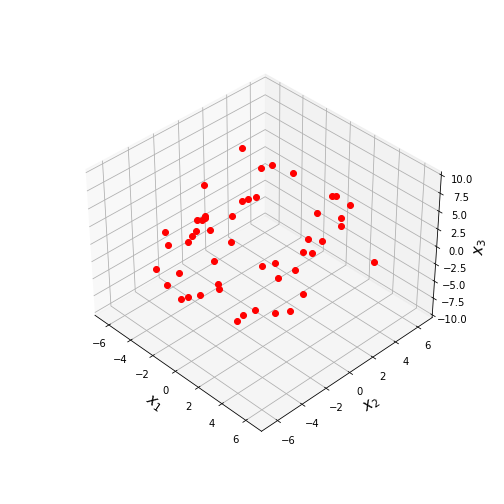

In [32]:
# %matplotlib qt
%matplotlib nbagg
ax = ut.plotSetup3d(-7, 7, -7, 7, -10, 10, figsize = (7, 7))
v = [4.0, 4.0, 2.0]
u = [-4.0, 3.0, 1.0]
npts = 50
# set locations of points that fall within x,y
xc = -7.0 + 14.0 * np.random.random(npts)
yc = -7.0 + 14.0 * np.random.random(npts)
A = np.array([u,v]).T
# project these points onto the plane
P = A @ np.linalg.inv(A.T @ A) @ A.T
coords = P @ np.array([xc, yc, np.zeros(npts)])
coords[2] += np.random.randn(npts)
ax.plot(coords[0], coords[1], 'ro', zs=coords[2], markersize = 6);

__Example.__  

In geography, local models of terrain are constructed from data $(u_1, v_1, y_1), \dots, (u_n, v_n, y_n)$ where $u_j, v_j$, and $y_j$ are latitude, longitude, and altitude, respectively.

Let's describe the linear models that gives a least-squares fit to such data.  The solution is called the least-squares _plane._

__Solution.__  We expect the data to satisfy these equations:

$$y_1 = \beta_0 + \beta_1 u_1 + \beta_2 v_1 + \epsilon_1$$
$$y_1 = \beta_0 + \beta_1 u_2 + \beta_2 v_2 + \epsilon_2$$
$$\vdots$$
$$y_1 = \beta_0 + \beta_1 u_n + \beta_2 v_n + \epsilon_n$$

This system has the matrix for $\mathbf{y} = X\mathbf{\beta} + \epsilon,$ where

$$\mathbf{y} = \begin{bmatrix}y_1\\y_1\\\vdots\\y_n\end{bmatrix},\;\;X = \begin{bmatrix}1&u_1&v_1\\1&u_2&v_2\\\vdots&\vdots&\vdots\\1&u_n&v_n\end{bmatrix},\;\;\mathbf{\beta}=\begin{bmatrix}\beta_0\\\beta_1\\\beta_2\end{bmatrix},\;\;\epsilon = \begin{bmatrix}\epsilon_1\\\epsilon_2\\\vdots\\\epsilon_n\end{bmatrix}$$

<IPython.core.display.Javascript object>


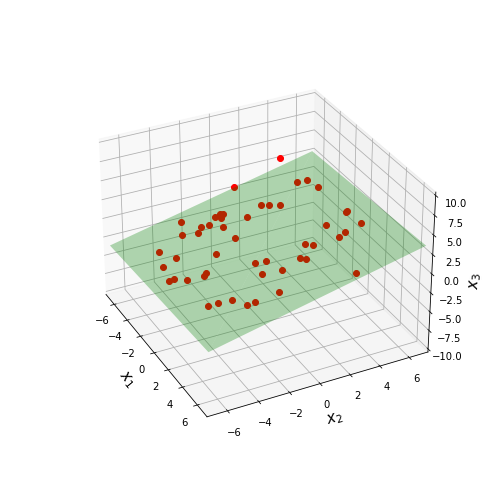

In [33]:
%matplotlib nbagg
ax = ut.plotSetup3d(-7, 7, -7, 7, -10, 10, figsize = (7, 7))
v = [4.0, 4.0, 2.0]
u = [-4.0, 3.0, 1.0]
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
npts = 50
ax.plot(coords[0], coords[1], 'ro', zs = coords[2], markersize=6);

This example shows that the linear model for multiple regression has the same form as the model for the simple regression in the earlier examples.

We can see that there the general principle is the same across all the different kinds of linear models.

Once $X$ is defined properly, the normal equations for $\mathbf{\beta}$ have the same matrix form, no matter how many variables are involved.

Thus, for any linear model where $X^TX$ is invertible, the least squares estimate $\hat{\mathbf{\beta}}$ is given by $(X^TX)^{-1}X^T\mathbf{y}$.

## Measuring the fit of a regression model: $R^2$

Given any $X$ and $\mathbf{y}$, the above algorithm will produce an output $\hat{\beta}$.

But how do we know whether the data is in fact well described by the model?

The most common measure of fit is $R^2$.

$R^2$ measures the __fraction of the variance__ of $\mathbf{y}$ that can be explained by the model $X\hat{\beta}$.

The variance of $\mathbf{y}$ is 

$$\text{Var}(\mathbf{y}) =\frac{1}{n} \sum_{i=1}^n \left(y_i-\overline{y}\right)^2$$

where $\overline{y}=\frac{1}{n}\sum_{i=1}^ny_i$.

For any given $n$, we can equally work with just 
$$\sum_{i=1}^n \left(y_i-\overline{y}\right)^2$$
which is called the __Total Sum of Squares__ (TSS).

Now to measure the quality of fit of a model, we break TSS down into two components. 

For any given $\mathbf{x}_i$, the prediction made by the model is $\hat{y_i} = \mathbf{x}_i^T\beta$.

Therefore, 
* the residual $\epsilon$ is $y_i - \hat{y_i}$, and 
* the part that the model "explains" is $\hat{y_i} - \overline{y_i}.$

Se we define Residual Sum of Squares (RSS) as:

$$\text{RSS} = \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2,$$

and Explained Sum of Squares (ESS) as:

$$\text{ESS} = \sum_{i=1}^n \left(\hat{y_i}-\overline{y}\right)^2,$$

Then it turns out that the total sum of squares is exactly equal to the sum of squares of the residuals plus the sum of squares of the explained part.

In other words:

$$\text{TSS} = \text{RSS} + \text{ESS}$$

Now, a good fit is one in which the model explains a large part of the variance of $\mathbf{y}$.  

So the measure of fit $R^2$ is defined as:

\begin{eqnarray}
R^2 & = & \frac{\text{ESS}}{\text{TSS}} = 1-\frac{\text{RSS}}{\text{TSS}}
\end{eqnarray}

As a result, $0\leq R^2\leq 1$.

The closer the value of $R^2$ is to $1$ the better the fit of the regression:
* small values of RSS imply that the residuals are small and therefore we have a better fit.

$R^2$ is called the __coefficient of determination.__  

It tells us "how well does the model predict the data?"

__WARNING -- WARNING -- WARNING__

Do __not__ confuse $R^2$ with Pearson's $r$, which is the __correlation coefficient.__

(To make matters worse, sometimes people talk about $r^2$... very confusing!)

The correlation coefficient tells us whether two variables are __correlated__.   

However, just because two variables are correlated does not mean that one is a good __predictor__ of the other!

To compare ground truth with predictions, we always use $R^2$.

## OLS in Practice

First, we'll look at a test case on synthetic data.

In [15]:
from sklearn import datasets
X, y = datasets.make_regression(n_samples=100, n_features=20, n_informative=5, bias=0.1, noise=30, random_state=1)

In [16]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              123.8
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                    1.03e-51
Time:                        11:51:04   Log-Likelihood:                         -468.30
No. Observations:                 100   AIC:                                      976.6
Df Residuals:                      80   BIC:                                      1029.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The $R^2$ value is very good.   We can see that the linear model does a very good job of predicting the observations $y_i$.

However, some of the independent variables may not contribute to the accuracy of the prediction. 

<IPython.core.display.Javascript object>


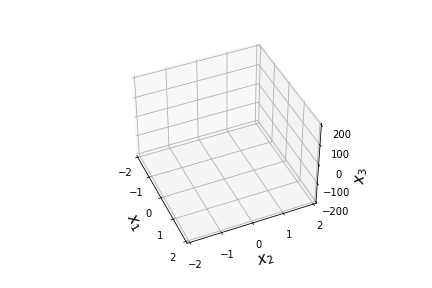

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1460,)  and requested shape (100,)

In [34]:
%matplotlib nbagg
ax = ut.plotSetup3d(-2, 2, -2, 2, -200, 200)
# try columns of X with large coefficients, or not
ax.plot(X[:, 0], X[:, 13], 'ro', zs=y, markersize = 4);

Note that each parameter of an independent variable has an associated confidence interval. 

If a coefficient is not distinguishable from zero, then we cannot assume that there is any relationship between the independent variable and the observations.

In other words, if the confidence interval for the parameter includes zero, the associated independent variable may not have any predictive value.

In [18]:
print('Confidence Intervals: {}'.format(results.conf_int()))
print('Parameters: {}'.format(results.params))

Confidence Intervals: [[  5.65891465  19.47559281]
 [ -9.44032559   1.77614877]
 [ -9.31636359   4.47701749]
 [ -4.12661379   8.15524508]
 [ -9.4808662    4.22965424]
 [ -5.49698033   7.07574692]
 [-10.22359973   4.08684835]
 [ 83.74738375  96.52928603]
 [ -6.77896356   6.75226985]
 [  8.80365396  21.73126149]
 [ -6.86882065   6.4194618 ]
 [ -6.97868351   7.1332267 ]
 [ -6.71228582   6.2218515 ]
 [ 82.96557061  97.07028228]
 [ -5.74782503   9.08465366]
 [ -1.06173893   9.85081724]
 [  2.02753258  15.5561241 ]
 [ 66.56165458  80.19256546]
 [ -8.90825108   5.0804296 ]
 [ -7.85545335   5.21424811]]
Parameters: [ 1.25672537e+01 -3.83208841e+00 -2.41967305e+00  2.01431564e+00
 -2.62560598e+00  7.89383294e-01 -3.06837569e+00  9.01383349e+01
 -1.33468527e-02  1.52674577e+01 -2.24679428e-01  7.72715974e-02
 -2.45217158e-01  9.00179264e+01  1.66841432e+00  4.39453916e+00
  8.79182834e+00  7.33771100e+01 -1.91391074e+00 -1.32060262e+00]


In [19]:
CIs = results.conf_int()
notSignificant = (CIs[:,0] < 0) & (CIs[:,1] > 0)
notSignificant

array([False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True])

In [20]:
Xsignif = X[:,~notSignificant]
Xsignif.shape

(100, 6)

By eliminating independent variables that are not significant, we help avoid overfitting.

In [21]:
model = sm.OLS(y, Xsignif)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              437.1
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                    2.38e-66
Time:                        11:51:05   Log-Likelihood:                         -473.32
No. Observations:                 100   AIC:                                      958.6
Df Residuals:                      94   BIC:                                      974.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Real Data: House Prices in Ames, Iowa

Let's see how powerful multiple regression can be on a real-world example.

A typical application of linear models is predicting house prices.   Linear models have been used for this problem for decades, and when a municipality does a value assessment on your house, they typically use a linear model.

We can consider various measurable attributes of a house (its "features") as the independent variables, and the most recent sale price of the house as the dependent variable.

For our case study, we will use the features:
* Lot Area (sq ft), 
* Gross Living Area (sq ft), 
* Number of Fireplaces, 
* Number of Full Baths, 
* Number of Half Baths, 
* Garage Area (sq ft), 
* Basement Area (sq ft)

So our design matrix will have 8 columns (including the constant for the intercept):

$$ X\beta = \mathbf{y}$$

and it will have one row for each house in the data set, with $y$ the sale price of the house.

We will use data from housing sales in Ames, Iowa from 2006 to 2009:

<img src="figs/ames-iowa-downtown.jpeg" alt="Figure" width="45%">

<p style = "text-align: center;">
Ames, Iowa</p>
<p style = "text-align: center;">
<a href="https://commons.wikimedia.org/wiki/File:Ames_Iowa_Main_Street.jpg">Tim Kiser (w:User:Malepheasant)</a>, <a href="https://creativecommons.org/licenses/by-sa/2.5">CC BY-SA 2.5</a>, via Wikimedia Commons</p>

In [22]:
df = pd.read_csv('data/ames-housing-data/train.csv')

In [23]:
df[['LotArea', 'GrLivArea', 'Fireplaces', 'FullBath', 'HalfBath', 'GarageArea', 'TotalBsmtSF', 'SalePrice']].head()

,LotArea,GrLivArea,Fireplaces,FullBath,HalfBath,GarageArea,TotalBsmtSF,SalePrice
0,8450,1710,0,2,1,548,856,208500
1,9600,1262,1,2,0,460,1262,181500
2,11250,1786,1,2,1,608,920,223500
3,9550,1717,1,1,0,642,756,140000
4,14260,2198,1,2,1,836,1145,250000


Some things to note here:
* House prices are in dollars
* Areas are in square feet
* Rooms are in counts

Do we have scaling concerns here?  

No, because each feature will get its own $\beta$, which will correct for the scaling differences between different units of measure.

In [24]:
X_no_intercept = df[['LotArea', 'GrLivArea', 'Fireplaces', 'FullBath', 'HalfBath', 'GarageArea', 'TotalBsmtSF']]
X_intercept = sm.add_constant(X_no_intercept)
y = df['SalePrice'].values

/Users/markcrovella/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


```{note}
Note that removing the intercept will cause the $R^2$ to go up, which is counter-intuitive.  The reason is explained here -- but amounts to the fact that the formula for R2 with/without an intercept is different.
https://stats.stackexchange.com/questions/26176/removal-of-statistically-significant-intercept-term-increases-r2-in-linear-mo/26205#26205
```

In [25]:
from sklearn import utils, model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_intercept, y, test_size = 0.5, random_state = 0)

In [26]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     325.5
Date:                Wed, 27 Oct 2021   Prob (F-statistic):          1.74e-218
Time:                        11:51:05   Log-Likelihood:                -8746.5
No. Observations:                 730   AIC:                         1.751e+04
Df Residuals:                     722   BIC:                         1.755e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.285e+04   5350.784     -8.007      

We see that we have:
* $\beta_0$: Intercept of -\$42,850
* $\beta_1$: Marginal value of one square foot of Lot Area: \$0.23 
    * but __NOTICE__ - this coefficient is not statistically different from zero!
* $\beta_2$: Marginal value of one square foot of Gross Living Area: \$48 
* $\beta_3$: Marginal value of one additional fireplace: \$10,890
* $\beta_4$: Marginal value of one additional full bath: \$14,900
* $\beta_5$: Marginal value of one additional half bath: \$15,600
* $\beta_6$: Marginal value of one square foot of Garage Area: \$99
* $\beta_7$: Marginal value of one square foot of Basement Area: \$62

Is our model doing a good job?  

There are many statistics for testing this question, but we'll just look at the predictions versus the ground truth.

For each house we compute its predicted sale value according to our model:

$$\hat{\mathbf{y}} = X\hat{\beta}$$

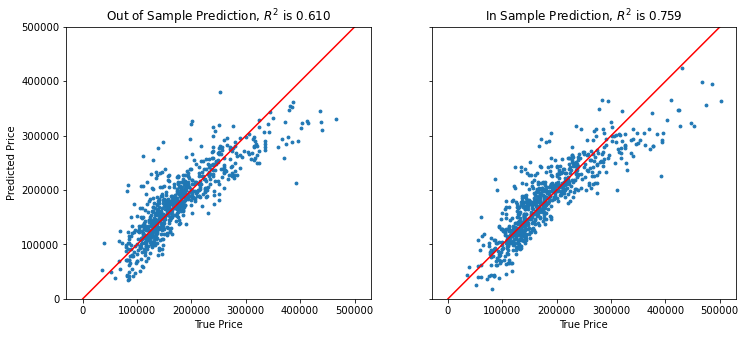

In [27]:
%matplotlib inline
from sklearn.metrics import r2_score

fig, (ax1, ax2) = plt.subplots(1,2,sharey = 'row', figsize=(12, 5))
y_oos_predict = results.predict(X_test)
r2_test = r2_score(y_test, y_oos_predict)
ax1.scatter(y_test, y_oos_predict, s = 8)
ax1.set_xlabel('True Price')
ax1.set_ylabel('Predicted Price')
ax1.plot([0,500000], [0,500000], 'r-')
ax1.axis('equal')
ax1.set_ylim([0, 500000])
ax1.set_xlim([0, 500000])
ax1.set_title(f'Out of Sample Prediction, $R^2$ is {r2_test:0.3f}')
#
y_is_predict = results.predict(X_train)
ax2.scatter(y_train, y_is_predict, s = 8)
r2_train = r2_score(y_train, y_is_predict)
ax2.set_xlabel('True Price')
ax2.plot([0,500000],[0,500000],'r-')
ax2.axis('equal')
ax2.set_ylim([0,500000])
ax2.set_xlim([0,500000])
ax2.set_title(f'In Sample Prediction, $R^2$ is {r2_train:0.3f}');

We see that the model does a reasonable job for house values less than about \$250,000. 

It tends to underestimate at both ends of the price range.

Note that the $R^2$ on the (held out) test data is 0.610.   

We are not doing as well on test data as on training data (somewhat to be expected).

For a better model, we'd want to consider more features of each house, and perhaps some additional functions such as polynomials as components of our model.